<a href="https://colab.research.google.com/github/Jcnok/Python-Data-Science-and-Machine-Learning-Bootcamp/blob/main/Projeto_de_dados_de_finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de dados do mercado financeiro

Neste projeto de dados, nos concentraremos na análise de dados exploratórios dos preços das ações. Tenha em mente que este projeto apenas pretende praticar suas habilidades de visualização e pandas, não é para ser uma análise financeira robusta ou ser tomado como um conselho financeiro.
____
** NOTA: Este projeto é extremamente desafiador, porque irá introduzir muitos novos conceitos e te fará procurar as coisas por conta própria (vamos apontar você na direção certa) para tentar resolver as tarefas emitidas. Sinta-se à vontade para passar pelo livro de conferências de soluções e no vídeo como um projeto "passo a passo" se você não quer ter que procurar as coisas sozinho. Você ainda aprenderá muito dessa forma! **
____
Vamos nos concentrar em algumas ações e ver como eles performaram durante a [crise financeira](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) até o início de 2021.

## Obter dados

Nesta seção, aprenderemos a usar pandas para ler diretamente os dados das finanças do yahoo usando pandas!

Primeiro, precisamos começar com as importações adequadas, que já apresentamos para você aqui.

* Nota: [Você precisará instalar pandas-datareader para que isso funcione!](Https://github.com/pydata/pandas-datareader) O datareader Pandas permite que você [leia informações das ações diretamente da internet](http : //pandas.pydata.org/pandas-docs/stable/remote_data.html) Use estes links para orientação de instalação (** pip install pandas-datareader **), ou simplesmente acompanhe a conferência de vídeo. *

### Os Imports

Já preenchidos para você.

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Dados

Precisamos obter dados usando o datareader de pandas. Obteremos informações sobre seguinetes ações:
* Itau='ITSA4.SA'
* Magazine_luiza='MGLU3.SA'
* Vale='VALE3.SA'
* BB = 'BBAS3.SA'
* Cielo = 'CIEL3.SA'
* Petrobras = 'PETR4.SA'

** Descubra como obter os dados de ações de 1 de janeiro de 2006 a 1º de janeiro de 2021 para cada uma das ações. Defina cada cada como um dataframe separado, com o nome da variável para que esse banco seja seu símbolo de ticker. Isso envolverá algumas etapas: **
1. Use datetime para definir objetos de início e fim de data e hora.
2. Descobrir o símbolo do ticker para cada banco.
2. Descubra como usar o datareader para pegar as cotações.

** Use [esta página de documentação](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) para obter dicas e instruções. Use o yahoo finance como um fonte, por exemplo: **
    
     

In [38]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2021,1,1)


In [48]:

Itau = data.DataReader("ITSA4.SA", "yahoo", start=start, end=end)
ML = data.DataReader("MGLU3.SA", "yahoo", start=start, end=end)
Vale = data.DataReader("VALE3.SA", "yahoo", start=start, end=end)
BB = data.DataReader("BBAS3.SA", "yahoo", start=start, end=end)
Cielo = data.DataReader("CIEL3.SA", "yahoo", start=start, end=end)
Petrobras = data.DataReader("PETR4.SA", "yahoo", start=start, end=end)


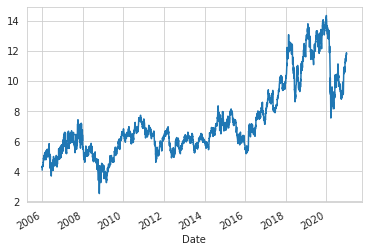

In [49]:
#Plotando um gráfico de fechamento
Itau['Close'].plot()

** Crie uma lista dos símbolos dos tickers (como strings) em ordem alfabética. Chame esta lista: tickers **

In [50]:
tickers = ['Itau','ML','Vale','BB','Cielo','Petrobras']
tickers

['Itau', 'ML', 'Vale', 'BB', 'Cielo', 'Petrobras']

** Use pd.concat para concatenar os DataFrames das ações em um único df chamado bd_stocks. Defina o argumento das chaves igual à lista de tickers. Também preste atenção em que eixo você concatena. **

In [51]:
bd_stocks = pd.concat([Itau,ML,Vale,BB,Cielo,Petrobras], axis=1, keys=tickers)
bd_stocks.head()

Itau                      ...  Petrobras                       
                High       Low      Open  ...      Close      Volume  Adj Close
Date                                      ...                                  
2006-01-02  4.065219  3.961542  4.065219  ...  19.045000   5230200.0  13.340967
2006-01-03  4.223462  4.048849  4.201636  ...  19.645000  11266800.0  13.761262
2006-01-04  4.392619  4.201636  4.310769  ...  19.740000   9003600.0  13.827811
2006-01-05  4.365336  4.228919  4.228919  ...  19.700001   8084000.0  13.799788
2006-01-06  4.348966  4.267116  4.338052  ...  20.424999  11941200.0  14.307653

[5 rows x 36 columns]

** Defina os níveis dos nomes das colunas (este é preenchido para você): **

In [52]:
bd_stocks.columns.names = ['BD Ticker','Stock Info']

** Verifique o cabeçalho do DataFrame bd_stocks. **

In [53]:
bd_stocks.head()

BD Ticker       Itau                      ...  Petrobras                       
Stock Info      High       Low      Open  ...      Close      Volume  Adj Close
Date                                      ...                                  
2006-01-02  4.065219  3.961542  4.065219  ...  19.045000   5230200.0  13.340967
2006-01-03  4.223462  4.048849  4.201636  ...  19.645000  11266800.0  13.761262
2006-01-04  4.392619  4.201636  4.310769  ...  19.740000   9003600.0  13.827811
2006-01-05  4.365336  4.228919  4.228919  ...  19.700001   8084000.0  13.799788
2006-01-06  4.348966  4.267116  4.338052  ...  20.424999  11941200.0  14.307653

[5 rows x 36 columns]

# Análise de dados exploratória

Vamos explorar os dados um pouco! Antes de prosseguir, sugiro que você verifique a documentação no [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) e [como usar .xs](http: // pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Consulte as soluções se você não consiga descobrir como usar .xs (), uma vez que isso será uma parte importante desse projeto.

** Qual é o preço máximo de fechamento para cada ação durante todo o período? **

In [54]:
bd_stocks.xs(key='Close',axis=1,level='Stock Info').max()

BD Ticker
Itau         14.350000
ML           27.450001
Vale         87.800003
BB           55.180000
Cielo        31.805555
Petrobras    52.509998
dtype: float64

** Crie um novo DataFrame vazio chamado returns. Este dataframe conterá os retornos para cada ação. Os retornos geralmente são definidos por: **

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [55]:
returns = pd.DataFrame()

** Podemos usar o método pct_change () pandas na coluna close para criar uma coluna que represente esse valor de retorno. Crie um loop for que vá e para cada Bd Stock Ticker cria essa coluna de retorno e configura-a como uma coluna nos dados DataFrame. **

In [56]:
for tick in tickers:
  returns[tick + 'Return'] = bd_stocks[tick]['Close'].pct_change()
returns.head()

,ItauReturn,MLReturn,ValeReturn,BBReturn,CieloReturn,PetrobrasReturn
Date,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.033557,NaN,0.039666,0.021898,NaN,0.031504
2006-01-04,0.025974,NaN,0.015562,0.135714,NaN,0.004836
2006-01-05,-0.018987,NaN,-0.001483,0.029769,NaN,-0.002026
2006-01-06,0.025806,NaN,0.011980,0.039292,NaN,0.036802


** Crie um parplot utilizando seaborn no dataframe de retorno. **

In [57]:
import seaborn as sns

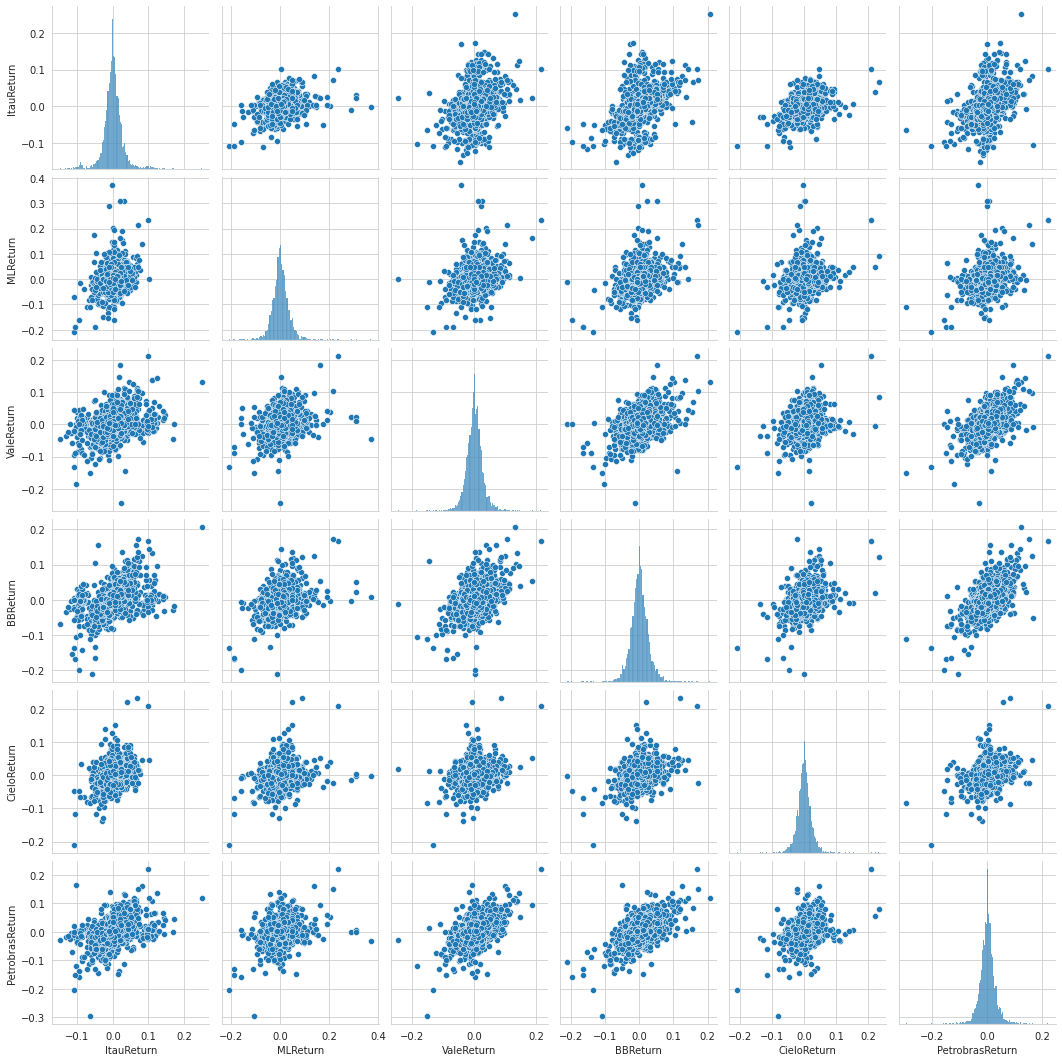

In [58]:
sns.pairplot(returns[1:])

** Usando o seu DataFrame returns, descubra quais datas cada ação teve o melhor e o pior dia de retorno. Você deve notar que algumas ações compartilham o mesmo dia para a pior queda. Alguma coisa significante aconteceu naquele dia? **

In [59]:
returns.idxmin()

ItauReturn        2009-01-14
MLReturn          2020-03-12
ValeReturn        2019-01-28
BBReturn          2016-03-15
CieloReturn       2020-03-12
PetrobrasReturn   2020-03-09
dtype: datetime64[ns]

#Quinta 12 de Março de 2020 Resumo do dia.
**Com a pandemia, a Bovespa para duas vezes no dia, afunda 14,7% e leva o maior tombo em quase 22 anos. O dólar ultrapassa os R$ 5 pela 1ª vez. Nos EUA, bolsa teve o pior desempenho desde 1987.**

In [60]:
#Quais datas cada ação teve o melhor retorno.
returns.idxmax()

ItauReturn        2008-10-13
MLReturn          2015-12-28
ValeReturn        2020-03-13
BBReturn          2008-10-13
CieloReturn       2020-03-25
PetrobrasReturn   2020-03-13
dtype: datetime64[ns]

** Dê uma olhada no desvio padrão dos retornos. Qual ação você classificaria como a mais arriscada durante todo o período de tempo? Qual você classificaria como a mais arriscado para o ano 2015? **

In [61]:
returns.std()

ItauReturn         0.028658
MLReturn           0.037660
ValeReturn         0.027738
BBReturn           0.028020
CieloReturn        0.024433
PetrobrasReturn    0.028980
dtype: float64

Nesse caso o ativo que teve um maior desvio padrão foi o ML com desvio de 0.037%, ou seja a ação mais arriscada duranta todo o período.

In [62]:
returns[(returns.index.date >= datetime.date(2015,1,1)) & (returns.index.date < datetime.date(2016,1,1))].std()

ItauReturn         0.019264
MLReturn           0.051873
ValeReturn         0.036252
BBReturn           0.030636
CieloReturn        0.018674
PetrobrasReturn    0.037610
dtype: float64

Em 2015 a ação com maior desvio padrão também foi a Magazine Luiza.

** Crie um distplot usando seaborn dos retornos de 2015 para ML **

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


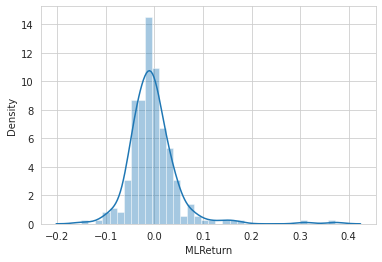

In [63]:
sns.distplot(returns[(returns.index.date >= datetime.date(2015,1,1)) & (returns.index.date < datetime.date(2016,1,1))]['MLReturn'])

** Crie um distplot usando seaborn dos retornos de 2008 para Vale **

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


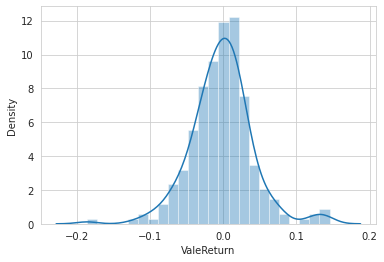

In [64]:
sns.distplot(returns[(returns.index.date >= datetime.date(2008,1,1)) & (returns.index.date < datetime.date(2009,1,1))]['ValeReturn'])

A distribuição dos retornos estão concentrados em -10, 0 e 10% mas houve dias em que as ações caíem até -20% como também subiram cerca de 15%.

Agora vamos plotar um distplot dos retornos da ibov para o ano 2020(COVID).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


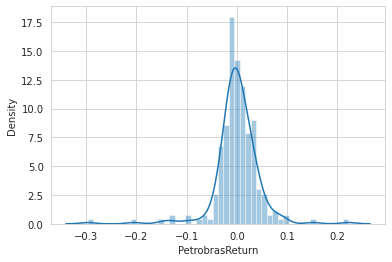

In [65]:
sns.distplot(returns[(returns.index.date >= datetime.date(2020,1,1)) & (returns.index.date < datetime.date(2021,1,1))]['PetrobrasReturn'])

# Mais visualização

Muito desse projeto se concentrará em visualizações. Sinta-se livre para usar qualquer uma das suas bibliotecas de visualização preferidas para tentar recriar os plots descritos abaixo, seaborn, matplotlib, plotly e cufflinks, ou apenas pandas.

### Importações

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Crie um gráfico de linha mostrando o preço de fechamento para cada banco para todo o índice de tempo. (Sugestão: tente usar um loop for ou use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) para obter uma seção transversal dos dados .) **

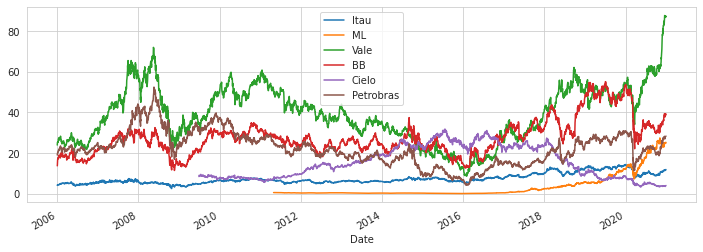

In [67]:
for tick in tickers:
  bd_stocks[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend()

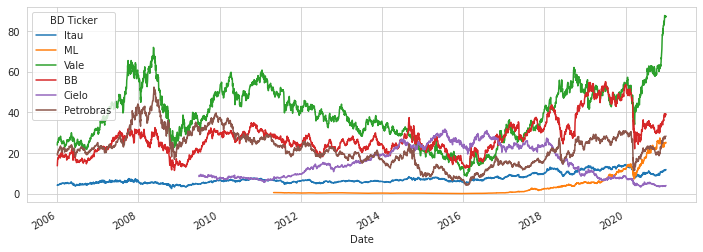

In [69]:

bd_stocks.xs(key='Close', level='Stock Info', axis=1).plot(figsize=(12,4), label=tick)


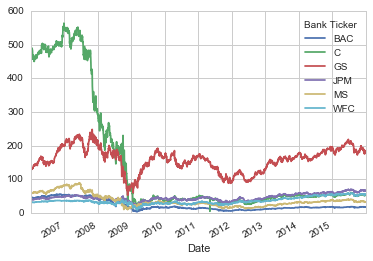

## Médias móveis

Vamos analisar as médias móveis para essas ações no ano de 2008.

** Trace a média de 30 dias para o preço da Vale para o ano de 2008 **

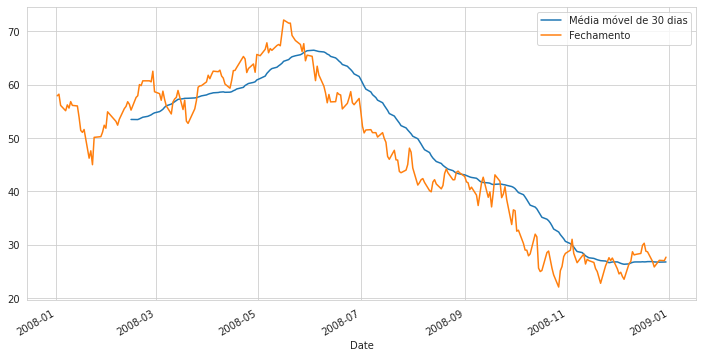

In [76]:
plt.figure(figsize=(12,6))
Vale2008 = Vale['Close'][Vale.index.year == 2008]
vale2008_media_movel = Vale2008.rolling(window=30).mean().plot(label='Média móvel de 30 dias')
Vale2008.plot(label='Fechamento')
plt.legend()

** Crie um mapa de calor da correlação entre os preços de fechamento das ações. **

In [79]:
corr_stock =  bd_stocks.xs(key='Close', level='Stock Info', axis=1).corr()
corr_stock

BD Ticker,Itau,ML,Vale,BB,Cielo,Petrobras
BD Ticker,,,,,,
Itau,1.000000,0.590414,0.353921,0.884428,-0.171551,-0.041230
ML,0.590414,1.000000,0.705782,0.508322,-0.643455,0.467513
Vale,0.353921,0.705782,1.000000,0.582704,-0.848958,0.721117
BB,0.884428,0.508322,0.582704,1.000000,-0.431641,0.318885
Cielo,-0.171551,-0.643455,-0.848958,-0.431641,1.000000,-0.773722
Petrobras,-0.041230,0.467513,0.721117,0.318885,-0.773722,1.000000


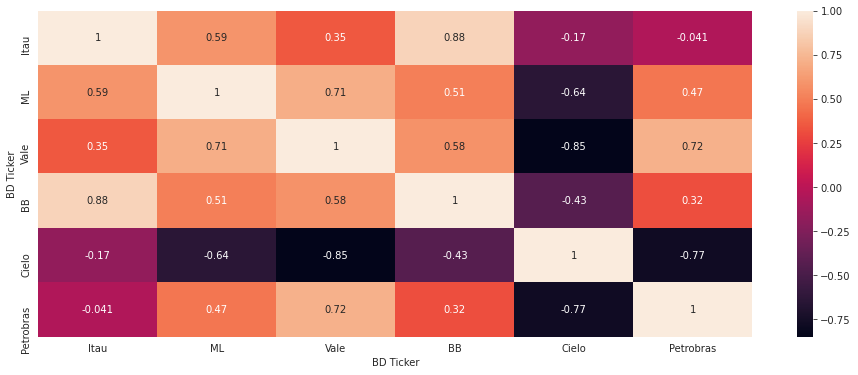

In [81]:
plt.figure(figsize=(16,6))
sns.heatmap(corr_stock, annot=True)

** Opcional: use o clustermap do seaborn para agrupar as correlações: **

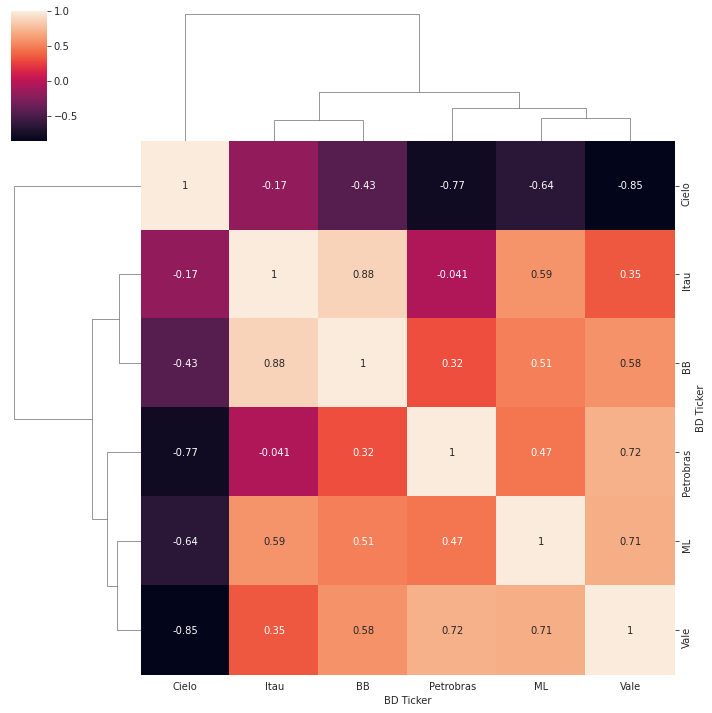

In [82]:
sns.clustermap(corr_stock, annot=True)

Definitivamente, muitos tópicos de finanças específicos aqui, então não se preocupe se você não os entendeu todos! A única coisa que você deve estar preocupado com a compreensão são os pandas básicos e operações de visualização.